In [19]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import re
import nltk

In [ ]:
# load old labelled data
old_labelled = pd.read_csv('old_labelled.csv')

In [20]:
## did manual labelling prior to this
## load the new combined data of all modules

new_labelled = pd.read_csv('total_labelled.csv')
new_labelled.head()

,Unnamed: 0,agency,agency_short,tag,course,rating,comment,aoi,topic
0,0,Institute Of Technical Education,ITE,(BDLCC) Basic Digital Literacy: Communication ...,BDLCC1: Communicate & Collaborate with the Rig...,5,collaboration the right tools empower the pers...,n,c
1,1,National Environment Agency,NEA,(BDLCC) Basic Digital Literacy: Communication ...,BDLCC1: Communicate & Collaborate with the Rig...,5,Nil,n,NaN
2,2,Health Sciences Authority,HSA,(BDLCC) Basic Digital Literacy: Communication ...,BDLCC1: Communicate & Collaborate with the Rig...,5,Good,n,NaN
3,3,Institute Of Technical Education,ITE,(BDLCC) Basic Digital Literacy: Communication ...,BDLCC3: Communicate & Collaborate with Agility,5,Very informative,n,c
4,4,Central Provident Fund Board,CPF,(BDLCC) Basic Digital Literacy: Communication ...,BDLCC2: Communicate & Collaborate with Etiquette,5,Useful,n,c


In [ ]:
# combine old & new labelled data
frames = [old_labelled, new_labelled]
labelled = pd.concat(frames, axis=0, ignore_index=True)
labelled

# Data Cleaning for NLP

### remove punctuation, tokenize, remove stop words, lemmatize

In [21]:
import string
import re
import nltk
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [22]:
## functions for cleaning tasks

def remove_punct(text):
    no_punct = ''.join(char for char in text if char not in string.punctuation)
    return no_punct

# creates a list of words
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

# remove common words with no meaning e.g. connectors
def remove_stopwords(token_list):
    text = [word for word in token_list if word not in stopwords]
    return text

wn = nltk.WordNetLemmatizer()

# convert words into their root forms
def lemmatize(text):
    lemmatized_text = [wn.lemmatize(word) for word in text]
    return lemmatized_text

In [23]:
labelled['clean_comment'] = labelled['comment'].apply(lambda x: remove_punct(x))
labelled['tokenized'] = labelled['clean_comment'].apply(lambda x: tokenize(x.lower()))
labelled['no_stopwords'] = labelled['tokenized'].apply(lambda x: remove_stopwords(x))
labelled['lemmatized'] = labelled['no_stopwords'].apply(lambda x: lemmatize(x))

labelled.head()

,Unnamed: 0,agency,agency_short,tag,course,rating,comment,aoi,topic,clean_comment,tokenized,no_stopwords,lemmatized
0,0,Institute Of Technical Education,ITE,(BDLCC) Basic Digital Literacy: Communication ...,BDLCC1: Communicate & Collaborate with the Rig...,5,collaboration the right tools empower the pers...,n,c,collaboration the right tools empower the pers...,"[collaboration, the, right, tools, empower, th...","[collaboration, right, tools, empower, person,...","[collaboration, right, tool, empower, person, ..."
1,1,National Environment Agency,NEA,(BDLCC) Basic Digital Literacy: Communication ...,BDLCC1: Communicate & Collaborate with the Rig...,5,Nil,n,NaN,Nil,"[nil, ]","[nil, ]","[nil, ]"
2,2,Health Sciences Authority,HSA,(BDLCC) Basic Digital Literacy: Communication ...,BDLCC1: Communicate & Collaborate with the Rig...,5,Good,n,NaN,Good,"[good, ]","[good, ]","[good, ]"
3,3,Institute Of Technical Education,ITE,(BDLCC) Basic Digital Literacy: Communication ...,BDLCC3: Communicate & Collaborate with Agility,5,Very informative,n,c,Very informative,"[very, informative]",[informative],[informative]
4,4,Central Provident Fund Board,CPF,(BDLCC) Basic Digital Literacy: Communication ...,BDLCC2: Communicate & Collaborate with Etiquette,5,Useful,n,c,Useful,[useful],[useful],[useful]


# Feature Creation

### create features to help classify better

In [24]:
# body length
labelled['body_len'] = labelled['comment'].apply(lambda x: len(x) - x.count(' '))
labelled.head()

,Unnamed: 0,agency,agency_short,tag,course,rating,comment,aoi,topic,clean_comment,tokenized,no_stopwords,lemmatized,body_len
0,0,Institute Of Technical Education,ITE,(BDLCC) Basic Digital Literacy: Communication ...,BDLCC1: Communicate & Collaborate with the Rig...,5,collaboration the right tools empower the pers...,n,c,collaboration the right tools empower the pers...,"[collaboration, the, right, tools, empower, th...","[collaboration, right, tools, empower, person,...","[collaboration, right, tool, empower, person, ...",74
1,1,National Environment Agency,NEA,(BDLCC) Basic Digital Literacy: Communication ...,BDLCC1: Communicate & Collaborate with the Rig...,5,Nil,n,NaN,Nil,"[nil, ]","[nil, ]","[nil, ]",3
2,2,Health Sciences Authority,HSA,(BDLCC) Basic Digital Literacy: Communication ...,BDLCC1: Communicate & Collaborate with the Rig...,5,Good,n,NaN,Good,"[good, ]","[good, ]","[good, ]",4
3,3,Institute Of Technical Education,ITE,(BDLCC) Basic Digital Literacy: Communication ...,BDLCC3: Communicate & Collaborate with Agility,5,Very informative,n,c,Very informative,"[very, informative]",[informative],[informative],15
4,4,Central Provident Fund Board,CPF,(BDLCC) Basic Digital Literacy: Communication ...,BDLCC2: Communicate & Collaborate with Etiquette,5,Useful,n,c,Useful,[useful],[useful],[useful],6


In [25]:
# in-built sentiment scorer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    compound_score = score['compound']
    return compound_score

In [26]:
labelled['vader'] = labelled['comment'].apply(lambda x: sentiment_analyzer_scores(x))    

labelled.head()

,Unnamed: 0,agency,agency_short,tag,course,rating,comment,aoi,topic,clean_comment,tokenized,no_stopwords,lemmatized,body_len,vader
0,0,Institute Of Technical Education,ITE,(BDLCC) Basic Digital Literacy: Communication ...,BDLCC1: Communicate & Collaborate with the Rig...,5,collaboration the right tools empower the pers...,n,c,collaboration the right tools empower the pers...,"[collaboration, the, right, tools, empower, th...","[collaboration, right, tools, empower, person,...","[collaboration, right, tool, empower, person, ...",74,0.0000
1,1,National Environment Agency,NEA,(BDLCC) Basic Digital Literacy: Communication ...,BDLCC1: Communicate & Collaborate with the Rig...,5,Nil,n,NaN,Nil,"[nil, ]","[nil, ]","[nil, ]",3,0.0000
2,2,Health Sciences Authority,HSA,(BDLCC) Basic Digital Literacy: Communication ...,BDLCC1: Communicate & Collaborate with the Rig...,5,Good,n,NaN,Good,"[good, ]","[good, ]","[good, ]",4,0.4404
3,3,Institute Of Technical Education,ITE,(BDLCC) Basic Digital Literacy: Communication ...,BDLCC3: Communicate & Collaborate with Agility,5,Very informative,n,c,Very informative,"[very, informative]",[informative],[informative],15,0.0000
4,4,Central Provident Fund Board,CPF,(BDLCC) Basic Digital Literacy: Communication ...,BDLCC2: Communicate & Collaborate with Etiquette,5,Useful,n,c,Useful,[useful],[useful],[useful],6,0.4404


## Evaluate features for AOI

In [27]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

C:\Users\Boon Kong\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
C:\Users\Boon Kong\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


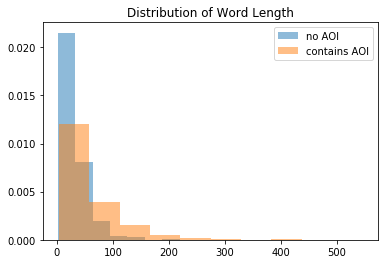

In [28]:
pyplot.hist(labelled[labelled['aoi'] == 'n']['body_len'], alpha=0.5, normed=True, label='no AOI')
pyplot.hist(labelled[labelled['aoi'] == 'y']['body_len'], alpha=0.5, normed=True, label='contains AOI')
pyplot.legend(loc='upper right')
pyplot.title('Distribution of Word Length')
pyplot.show()

C:\Users\Boon Kong\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
C:\Users\Boon Kong\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


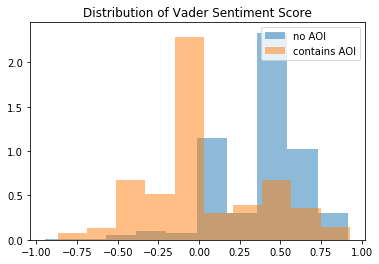

In [29]:
pyplot.hist(labelled[labelled['aoi'] == 'n']['vader'], alpha=0.5, normed=True, label='no AOI')
pyplot.hist(labelled[labelled['aoi'] == 'y']['vader'], alpha=0.5, normed=True, label='contains AOI')
pyplot.legend(loc='upper right')
pyplot.title('Distribution of Vader Sentiment Score')
pyplot.show()

these 2 features are applicable for AOI classification
- comments containing AOI usually have more words
- comments containing AOI are usually more negative

## Evaluate features for Topics

C:\Users\Boon Kong\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
C:\Users\Boon Kong\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\Boon Kong\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


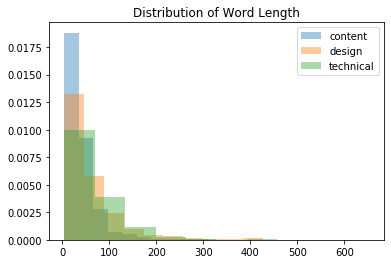

In [30]:
pyplot.hist(labelled[labelled['topic'] == 'c']['body_len'], alpha=0.4, normed=True, label='content')
pyplot.hist(labelled[labelled['topic'] == 'd']['body_len'], alpha=0.4, normed=True, label='design')
pyplot.hist(labelled[labelled['topic'] == 't']['body_len'], alpha=0.4, normed=True, label='technical')
pyplot.legend(loc='upper right')
pyplot.title('Distribution of Word Length')
pyplot.show()

C:\Users\Boon Kong\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
C:\Users\Boon Kong\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\Boon Kong\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


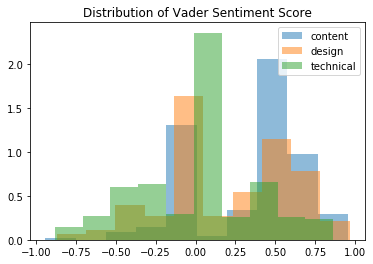

In [31]:
pyplot.hist(labelled[labelled['topic'] == 'c']['vader'], alpha=0.5, normed=True, label='content')
pyplot.hist(labelled[labelled['topic'] == 'd']['vader'], alpha=0.5, normed=True, label='design')
pyplot.hist(labelled[labelled['topic'] == 't']['vader'], alpha=0.5, normed=True, label='technical')
pyplot.legend(loc='upper right')
pyplot.title('Distribution of Vader Sentiment Score')
pyplot.show()

these 2 features are not applicable for topic classification

In [32]:
labelled.to_csv('clean.csv')

## save dataset for AOI classification

In [33]:
d1 = labelled.dropna(subset=['aoi'])
d1.drop(d1.columns[0], axis=1,inplace=True)
d1

C:\Users\Boon Kong\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,agency,agency_short,tag,course,rating,comment,aoi,topic,clean_comment,tokenized,no_stopwords,lemmatized,body_len,vader
0,Institute Of Technical Education,ITE,(BDLCC) Basic Digital Literacy: Communication ...,BDLCC1: Communicate & Collaborate with the Rig...,5,collaboration the right tools empower the pers...,n,c,collaboration the right tools empower the pers...,"[collaboration, the, right, tools, empower, th...","[collaboration, right, tools, empower, person,...","[collaboration, right, tool, empower, person, ...",74,0.0000
1,National Environment Agency,NEA,(BDLCC) Basic Digital Literacy: Communication ...,BDLCC1: Communicate & Collaborate with the Rig...,5,Nil,n,NaN,Nil,"[nil, ]","[nil, ]","[nil, ]",3,0.0000
2,Health Sciences Authority,HSA,(BDLCC) Basic Digital Literacy: Communication ...,BDLCC1: Communicate & Collaborate with the Rig...,5,Good,n,NaN,Good,"[good, ]","[good, ]","[good, ]",4,0.4404
3,Institute Of Technical Education,ITE,(BDLCC) Basic Digital Literacy: Communication ...,BDLCC3: Communicate & Collaborate with Agility,5,Very informative,n,c,Very informative,"[very, informative]",[informative],[informative],15,0.0000
4,Central Provident Fund Board,CPF,(BDLCC) Basic Digital Literacy: Communication ...,BDLCC2: Communicate & Collaborate with Etiquette,5,Useful,n,c,Useful,[useful],[useful],[useful],6,0.4404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18194,Ngee Ann Polytechnic,NP,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL3: Digital Tools that Support My Work,2,It is very difficult to do the quiz on the mob...,y,t,It is very difficult to do the quiz on the mob...,"[it, is, very, difficult, to, do, the, quiz, o...","[difficult, quiz, mobile, phone, difficult, sc...","[difficult, quiz, mobile, phone, difficult, sc...",80,-0.6478
18199,Singapore Customs,MOF,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL2: Global Technology Trends,5,"Talk about global technology, singapore should...",y,NaN,Talk about global technology singapore should ...,"[talk, about, global, technology, singapore, s...","[talk, global, technology, singapore, improved...","[talk, global, technology, singapore, improved...",242,0.6908
18205,Ministry Of Manpower,MOM,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL3: Digital Tools that Support My Work,4,More facts on thing not started yet in MOM.,y,NaN,More facts on thing not started yet in MOM,"[more, facts, on, thing, not, started, yet, in...","[facts, thing, started, yet, mom]","[fact, thing, started, yet, mom]",35,0.0000
18206,Monetary Authority Of Singapore,MAS,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL1: Why is Digital Transformation Important?,5,The app is draggy at times.,y,t,The app is draggy at times,"[the, app, is, draggy, at, times]","[app, draggy, times]","[app, draggy, time]",22,0.0000


In [34]:
d1.to_csv('aoi_clean.csv')

## save dataset for topic classification

In [35]:
d2 = labelled.dropna(subset=['topic'])
d2.drop(d2.columns[0], axis=1,inplace=True)
d2

C:\Users\Boon Kong\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,agency,agency_short,tag,course,rating,comment,aoi,topic,clean_comment,tokenized,no_stopwords,lemmatized,body_len,vader
0,Institute Of Technical Education,ITE,(BDLCC) Basic Digital Literacy: Communication ...,BDLCC1: Communicate & Collaborate with the Rig...,5,collaboration the right tools empower the pers...,n,c,collaboration the right tools empower the pers...,"[collaboration, the, right, tools, empower, th...","[collaboration, right, tools, empower, person,...","[collaboration, right, tool, empower, person, ...",74,0.0000
3,Institute Of Technical Education,ITE,(BDLCC) Basic Digital Literacy: Communication ...,BDLCC3: Communicate & Collaborate with Agility,5,Very informative,n,c,Very informative,"[very, informative]",[informative],[informative],15,0.0000
4,Central Provident Fund Board,CPF,(BDLCC) Basic Digital Literacy: Communication ...,BDLCC2: Communicate & Collaborate with Etiquette,5,Useful,n,c,Useful,[useful],[useful],[useful],6,0.4404
8,National Environment Agency,NEA,(BDLCC) Basic Digital Literacy: Communication ...,BDLCC2: Communicate & Collaborate with Etiquette,4,Good reminder,n,c,Good reminder,"[good, reminder, ]","[good, reminder, ]","[good, reminder, ]",12,0.4404
10,Housing Development Board,HDB,(BDLCC) Basic Digital Literacy: Communication ...,BDLCC1: Communicate & Collaborate with the Rig...,4,Very interesting,n,c,Very interesting,"[very, interesting]",[interesting],[interesting],15,0.4576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20935,Immigration & Checkpoints Authority,MHA,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL2: Global Technology Trends,3,Difficult to read infographics using handphone...,NaN,t,Difficult to read infographics using handphone...,"[difficult, to, read, infographics, using, han...","[difficult, read, infographics, using, handpho...","[difficult, read, infographics, using, handpho...",133,-0.3612
20938,Housing Development Board,HDB,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL2: Global Technology Trends,4,App will hang & shut down,NaN,t,App will hang shut down,"[app, will, hang, shut, down]","[app, hang, shut]","[app, hang, shut]",20,0.0000
20951,Ministry Of Communications And Information,MCI,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL4: How Technology has Improved the Workplace,2,The scrolling of articles is not very smooth c...,NaN,t,The scrolling of articles is not very smooth c...,"[the, scrolling, of, articles, is, not, very, ...","[scrolling, articles, smooth, cos, keeps, goin...","[scrolling, article, smooth, co, keep, going, ...",101,0.0000
20963,Ministry Of Social And Family Development,MSF,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL2: Global Technology Trends,3,Should provide clickable links if you want peo...,NaN,t,Should provide clickable links if you want peo...,"[should, provide, clickable, links, if, you, w...","[provide, clickable, links, want, people, read...","[provide, clickable, link, want, people, read,...",118,0.0772


In [36]:
d2.to_csv('topic_clean.csv')